<a href="https://colab.research.google.com/github/priyanka-261296/Web-Scrapping-of-Flipkart/blob/main/web_Scrapping_of_Flipkart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***WEB SCRAPPING OF FLIPKART FOR LAPTOPS***

**Lets Import all the libraries**

In [ ]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from urllib.request import urlopen

***Input the URL to be scrapped***

In [ ]:
url = "https://www.flipkart.com/search?q=best%20laptops%20under%2080000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
url

'https://www.flipkart.com/search?q=best%20laptops%20under%2080000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

***Use urlopen to open the url and read the details in i***t

In [ ]:
page = urlopen(url)
page_html = page.read()
page.close()
page_soup = BeautifulSoup(page_html, "html.parser")

***Checking for all the containers available.***

In [ ]:
data_list=[]
containers = page_soup.findAll("div", { "class": "_2kHMtA"})
print(len(containers))


40


***Using the BeautifulSoup, get all the parsed tree into a nicely formatted Unicode string, with a separate line for each tag and each string***.

In [ ]:
print(BeautifulSoup.prettify(containers[3]))

<div class="_2kHMtA">
 <div class="_2tfzpE">
  <span>
   Ad
  </span>
 </div>
 <a class="_1fQZEK" href="/hp-envy-x360-ryzen-5-hexa-core-4500u-8-gb-256-gb-ssd-windows-10-home-13-ay0044au-2-1-laptop/p/itmac0182a1adc96?pid=COMFSFNWEYZQ3HHH&amp;lid=LSTCOMFSFNWEYZQ3HHHKBHYBX&amp;marketplace=FLIPKART&amp;q=best+laptops+under+80000&amp;store=search.flipkart.com&amp;srno=s_1_4&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_LhyDqnzYCRJmvns2GXQQwE%2FdDYXjNXllhc0Z81eqRddgoP%2BFE0rKrq8STskhmVvNfq0vY%2BpPqjIbNrHlu8WMJw%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=xr2tdh7gz40000001620830754017&amp;qH=cdff68aec3053e4d" rel="noopener noreferrer" target="_blank">
  <div class="MIXNux">
   <div class="_2QcLo-">
    <div>
     <div class="CXW8mj" style="height:200px;width:200px">
      <img alt="HP Envy x360 Ryzen 5 Hexa Core 4500U - (8 GB/256 GB SSD/Windows 10 Home) 13-ay0044AU 2 in 1 Laptop" class="_396cs4 _3exPp9" src="https://rukminim1.flixcart.com/image/312/312/kkmwr680/computer/9/t/

***Get the Name of the produt:***

In [ ]:
container = containers[4]
prod_name = container.div.img["alt"]
print(prod_name)

DELL G3 Core i7 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 ...


***Get the Original Price of the product:***

In [ ]:
original_price = container.findAll("div", {"class": "_3I9_wc _27UcVY"})
print(original_price[0].text)

₹93,971


***Get the Discount Percentage on the product***

In [ ]:
discount_percent = container.findAll("div", {"class": "_3Ay6Sb"})
print(discount_percent[0].text)

17% off


***Get the Discounted Price of the product***

In [ ]:
discounted_price = container.findAll("div", {"class": "_30jeq3 _1_WHN1"})
print(discounted_price[0].text)

₹77,990


***Get the Product Ratings:***

In [ ]:
prod_ratings = container.findAll("span", {"class": "_1lRcqv"})
print(prod_ratings[0].text)

4.4


***Get the Number of Product Reviews:***

In [ ]:
reviews = container.findAll("span", {"class" : "_2_R_DZ"})
print(reviews[0].text)

62 Ratings & 8 Reviews


***Make a csv file and then edit in it the details:***
***Getting the Detailes in Summary Form*** 

In [ ]:
data_list=[]
for container in containers[:5]:
    temp_dict={}
    product_name = container.findAll("div", {"class": "_4rR01T"})    
    temp_dict['prod_name'] = product_name[0].text.strip()
    
    original_price = container.findAll("div", {"class": "_3I9_wc _27UcVY"})
    temp_dict['original'] = original_price[0].text.strip()
    
    discount_percent = container.findAll("div", {"class": "_3Ay6Sb"})
    temp_dict['percent'] = discount_percent[0].text.strip()
    
    discounted_price = container.findAll("div", {"class": "_30jeq3 _1_WHN1"})
    temp_dict['discount'] = discounted_price[0].text.strip()

    rating_container = container.findAll("span", {"class": "_1lRcqv"})
    temp_dict['prod_rating'] = rating_container[0].text.strip()
    
    reviews_container = container.findAll("span", {"class": "_2_R_DZ"})
    temp_dict['reviews_rating'] = reviews_container[0].text
    data_list.append( temp_dict)
container_list=pd.DataFrame(data_list)
container_list       

,prod_name,original,percent,discount,prod_rating,reviews_rating
0,Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...,"₹1,15,390",32% off,"₹77,990",4.3,635 Ratings & 107 Reviews
1,ASUS ZenBook Duo Core i5 10th Gen - (8 GB/512 ...,"₹1,08,990",26% off,"₹79,890",4.2,44 Ratings & 6 Reviews
2,MICROSOFT Surface Pro 7 Core i5 10th Gen - (8 ...,"₹93,999",15% off,"₹78,990",4.3,61 Ratings & 5 Reviews
3,HP Envy x360 Ryzen 5 Hexa Core 4500U - (8 GB/2...,"₹85,736",24% off,"₹64,990",4.5,181 Ratings & 32 Reviews
4,DELL G3 Core i7 10th Gen - (8 GB/512 GB SSD/Wi...,"₹93,971",17% off,"₹77,990",4.4,62 Ratings & 8 Reviews


In [ ]:
      import csv
      with open('product.csv','w',newline='')as file:
        writer=csv.writer(file)

In [ ]:
container_list.to_csv('product.csv')

In [ ]:
df=pd.read_csv('product.csv')
df

,Unnamed: 0,prod_name,original,percent,discount,prod_rating,reviews_rating
0,0,Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...,"₹1,15,390",32% off,"₹77,990",4.3,635 Ratings & 107 Reviews
1,1,ASUS ZenBook Duo Core i5 10th Gen - (8 GB/512 ...,"₹1,08,990",26% off,"₹79,890",4.2,44 Ratings & 6 Reviews
2,2,MICROSOFT Surface Pro 7 Core i5 10th Gen - (8 ...,"₹93,999",15% off,"₹78,990",4.3,61 Ratings & 5 Reviews
3,3,HP Envy x360 Ryzen 5 Hexa Core 4500U - (8 GB/2...,"₹85,736",24% off,"₹64,990",4.5,181 Ratings & 32 Reviews
4,4,DELL G3 Core i7 10th Gen - (8 GB/512 GB SSD/Wi...,"₹93,971",17% off,"₹77,990",4.4,62 Ratings & 8 Reviews


In [ ]:
df.head()

,Unnamed: 0,prod_name,original,percent,discount,prod_rating,reviews_rating
0,0,Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...,"₹1,15,390",32% off,"₹77,990",4.3,635 Ratings & 107 Reviews
1,1,ASUS ZenBook Duo Core i5 10th Gen - (8 GB/512 ...,"₹1,08,990",26% off,"₹79,890",4.2,44 Ratings & 6 Reviews
2,2,MICROSOFT Surface Pro 7 Core i5 10th Gen - (8 ...,"₹93,999",15% off,"₹78,990",4.3,61 Ratings & 5 Reviews
3,3,HP Envy x360 Ryzen 5 Hexa Core 4500U - (8 GB/2...,"₹85,736",24% off,"₹64,990",4.5,181 Ratings & 32 Reviews
4,4,DELL G3 Core i7 10th Gen - (8 GB/512 GB SSD/Wi...,"₹93,971",17% off,"₹77,990",4.4,62 Ratings & 8 Reviews


In [ ]:
df.tail()

,Unnamed: 0,prod_name,original,percent,discount,prod_rating,reviews_rating
0,0,Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...,"₹1,15,390",32% off,"₹77,990",4.3,635 Ratings & 107 Reviews
1,1,ASUS ZenBook Duo Core i5 10th Gen - (8 GB/512 ...,"₹1,08,990",26% off,"₹79,890",4.2,44 Ratings & 6 Reviews
2,2,MICROSOFT Surface Pro 7 Core i5 10th Gen - (8 ...,"₹93,999",15% off,"₹78,990",4.3,61 Ratings & 5 Reviews
3,3,HP Envy x360 Ryzen 5 Hexa Core 4500U - (8 GB/2...,"₹85,736",24% off,"₹64,990",4.5,181 Ratings & 32 Reviews
4,4,DELL G3 Core i7 10th Gen - (8 GB/512 GB SSD/Wi...,"₹93,971",17% off,"₹77,990",4.4,62 Ratings & 8 Reviews


In [ ]:
df.describe()

,Unnamed: 0,prod_rating
count,5.000000,5.000000
mean,2.000000,4.340000
std,1.581139,0.114018
min,0.000000,4.200000
25%,1.000000,4.300000
50%,2.000000,4.300000
75%,3.000000,4.400000
max,4.000000,4.500000


In [ ]:
df.isnull().sum()

Unnamed: 0        0
prod_name         0
original          0
percent           0
discount          0
prod_rating       0
reviews_rating    0
dtype: int64

In [ ]:
df.shape

(5, 7)

In [ ]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
df.size

35

In [ ]:
df.columns

Index(['Unnamed: 0', 'prod_name', 'original', 'percent', 'discount',
       'prod_rating', 'reviews_rating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5 non-null      int64  
 1   prod_name       5 non-null      object 
 2   original        5 non-null      object 
 3   percent         5 non-null      object 
 4   discount        5 non-null      object 
 5   prod_rating     5 non-null      float64
 6   reviews_rating  5 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 408.0+ bytes


In [ ]:
df.head(10)

,Unnamed: 0,prod_name,original,percent,discount,prod_rating,reviews_rating
0,0,Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...,"₹1,15,390",32% off,"₹77,990",4.3,635 Ratings & 107 Reviews
1,1,ASUS ZenBook Duo Core i5 10th Gen - (8 GB/512 ...,"₹1,08,990",26% off,"₹79,890",4.2,44 Ratings & 6 Reviews
2,2,MICROSOFT Surface Pro 7 Core i5 10th Gen - (8 ...,"₹93,999",15% off,"₹78,990",4.3,61 Ratings & 5 Reviews
3,3,HP Envy x360 Ryzen 5 Hexa Core 4500U - (8 GB/2...,"₹85,736",24% off,"₹64,990",4.5,181 Ratings & 32 Reviews
4,4,DELL G3 Core i7 10th Gen - (8 GB/512 GB SSD/Wi...,"₹93,971",17% off,"₹77,990",4.4,62 Ratings & 8 Reviews


In [ ]:
df['prod_name'].unique().shape

(5,)

In [ ]:
df['prod_name'].unique()

array(['Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home/4 GB Graphics/NV...',
       'ASUS ZenBook Duo Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/2 GB Graphics) UX481FL-BM5811T Th...',
       'MICROSOFT Surface Pro 7 Core i5 10th Gen - (8 GB/128 GB SSD/Windows 10 Home) 1866 2 in 1 Laptop',
       'HP Envy x360 Ryzen 5 Hexa Core 4500U - (8 GB/256 GB SSD/Windows 10 Home) 13-ay0044AU 2 in 1 Laptop',
       'DELL G3 Core i7 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 ...'],
      dtype=object)

In [ ]:
df['original'].unique().shape

(5,)

In [ ]:
df['original'].unique()

array(['₹1,15,390', '₹1,08,990', '₹93,999', '₹85,736', '₹93,971'],
      dtype=object)

In [ ]:
df[['prod_name','original']]

,prod_name,original
0,Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...,"₹1,15,390"
1,ASUS ZenBook Duo Core i5 10th Gen - (8 GB/512 ...,"₹1,08,990"
2,MICROSOFT Surface Pro 7 Core i5 10th Gen - (8 ...,"₹93,999"
3,HP Envy x360 Ryzen 5 Hexa Core 4500U - (8 GB/2...,"₹85,736"
4,DELL G3 Core i7 10th Gen - (8 GB/512 GB SSD/Wi...,"₹93,971"


In [ ]:
df.loc[0]

Unnamed: 0                                                        0
prod_name         Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...
original                                                  ₹1,15,390
percent                                                     32% off
discount                                                    ₹77,990
prod_rating                                                     4.3
reviews_rating                            635 Ratings & 107 Reviews
Name: 0, dtype: object

In [ ]:
df.iloc[[0,2]]

,Unnamed: 0,prod_name,original,percent,discount,prod_rating,reviews_rating
0,0,Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...,"₹1,15,390",32% off,"₹77,990",4.3,635 Ratings & 107 Reviews
2,2,MICROSOFT Surface Pro 7 Core i5 10th Gen - (8 ...,"₹93,999",15% off,"₹78,990",4.3,61 Ratings & 5 Reviews


In [ ]:
df=pd.read_csv('product.csv')
df

,Unnamed: 0,prod_name,original,percent,discount,prod_rating,reviews_rating
0,0,Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...,"₹1,15,390",32% off,"₹77,990",4.3,635 Ratings & 107 Reviews
1,1,ASUS ZenBook Duo Core i5 10th Gen - (8 GB/512 ...,"₹1,08,990",26% off,"₹79,890",4.2,44 Ratings & 6 Reviews
2,2,MICROSOFT Surface Pro 7 Core i5 10th Gen - (8 ...,"₹93,999",15% off,"₹78,990",4.3,61 Ratings & 5 Reviews
3,3,HP Envy x360 Ryzen 5 Hexa Core 4500U - (8 GB/2...,"₹85,736",24% off,"₹64,990",4.5,181 Ratings & 32 Reviews
4,4,DELL G3 Core i7 10th Gen - (8 GB/512 GB SSD/Wi...,"₹93,971",17% off,"₹77,990",4.4,62 Ratings & 8 Reviews


In [ ]:
df.iloc[[0,2],[0,3]]

,Unnamed: 0,percent
0,0,32% off
2,2,15% off


***Visualizing Basic Analysis of the Data using Plots***

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

***Bar Plot Original Price VS Discount Price***

***HOW MUCH PERCENT DISTOUNT GET ON ORIGINAL PRICE OF LAPTO***P

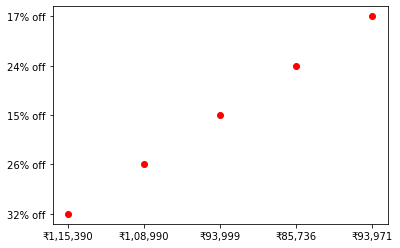

In [ ]:
plt.scatter(x=df['original'],y=df['percent'],color='red')
plt.show()

**SHOWING ORIGINAL PRICE OF LAPTOPS**

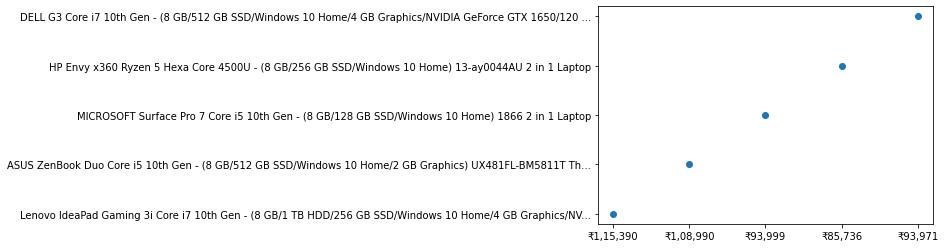

In [ ]:
plt.scatter(x=df['original'],y=df['prod_name'])
plt.show()

***SHOWING PRODUCT RATING AND ORIGINAL PRICE OF LAPTOPS***

<function matplotlib.pyplot.show>

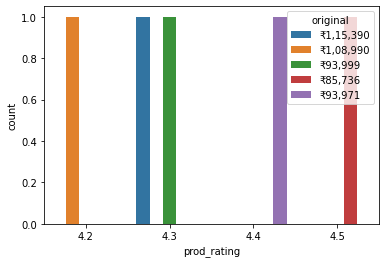

In [ ]:
sns.countplot(data=df,x='prod_rating',hue='original')
plt.show

***ORIGINAL PRICE AND DISCOUNT PRICE DISCRIPING ON GRAPH***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


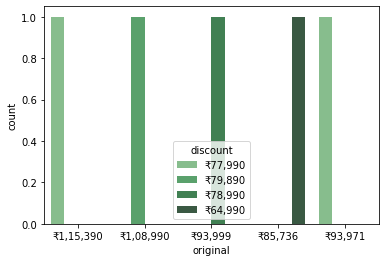

In [ ]:
sns.countplot("original", hue = "discount",data=container_list, palette = "Greens_d")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


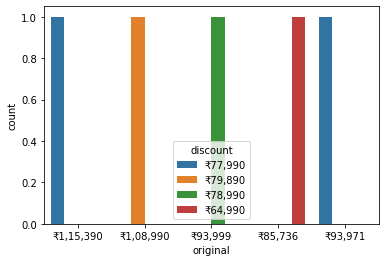

In [ ]:
sns.countplot("original", hue = "discount", data = container_list)
plt.show()
